# Tarea -  MNIST

### Cargas

In [5]:
!pip install seaborn 

In [18]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import mnist

In [20]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, MaxPool2D, Conv2D,Reshape

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils

np.random.seed(123) 

In [23]:
#datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
#Estandarización
maximo = X_train.max()

X_test = X_test / maximo

X_train = X_train / maximo


In [25]:
def my_nn(activation="relu", optimizer="adam", layers=(100, 200,100,50)):
  Xin = Input(shape=(28, 28))
  X = Flatten()(Xin)
  for layer in layers:
    X = Dense(layer, activation=activation)(X)
    X = Dropout(.5)(X)

  X = Dense(10, activation="softmax")(X)

  model = Model(inputs=Xin, outputs=X)

  model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  model.summary()
  return model

In [26]:
tf.keras.backend.clear_session()
model = my_nn(layers=(350,350,350,350,200,100),optimizer="adam")
model.fit(X_train, y_train, epochs=60,batch_size=32)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 350)               274750    
_________________________________________________________________
dropout (Dropout)            (None, 350)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dropout_1 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 350)               122850

60000/60000 [==============================] - 20s 328us/sample - loss: 0.5657 - accuracy: 0.8124
Epoch 54/60
60000/60000 [==============================] - 21s 344us/sample - loss: 0.5787 - accuracy: 0.8074
Epoch 55/60
60000/60000 [==============================] - 21s 349us/sample - loss: 0.5726 - accuracy: 0.8058
Epoch 56/60
60000/60000 [==============================] - 20s 327us/sample - loss: 0.5818 - accuracy: 0.8043
Epoch 57/60
60000/60000 [==============================] - 20s 337us/sample - loss: 0.5715 - accuracy: 0.8061
Epoch 58/60
60000/60000 [==============================] - 20s 333us/sample - loss: 0.5746 - accuracy: 0.8046
Epoch 59/60
60000/60000 [==============================] - 21s 344us/sample - loss: 0.5756 - accuracy: 0.8071
Epoch 60/60
60000/60000 [==============================] - 21s 343us/sample - loss: 0.5794 - accuracy: 0.8055


In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("M1 - Test accuracy: {:.4f}".format(m1_test_accuracy))

10000/10000 [==============================] - 2s 172us/sample - loss: 0.5465 - accuracy: 0.8128
M1 - Test accuracy: 0.8784


In [16]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

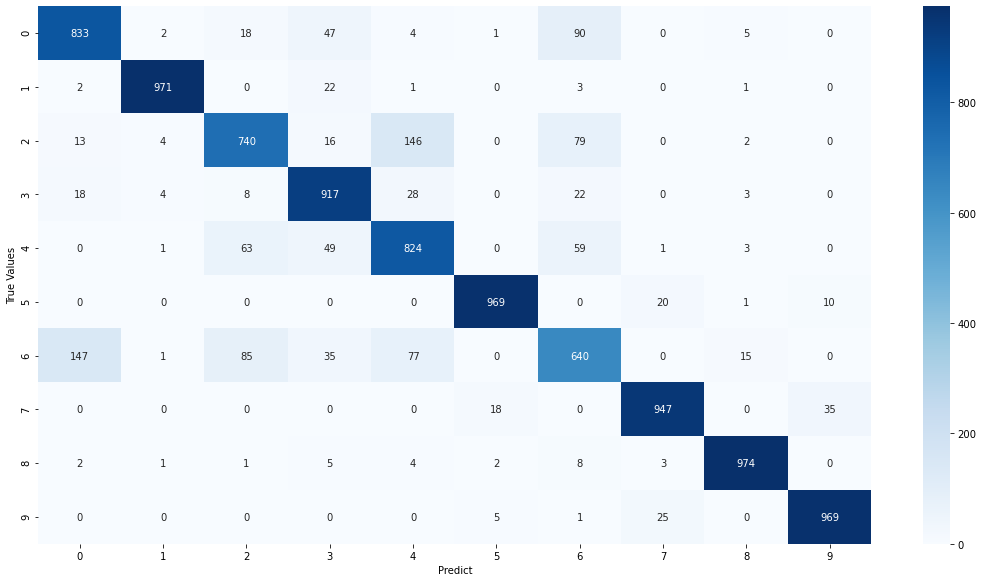

In [17]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(con_mat, annot=True, cmap=plt.cm.Blues, fmt="d")
plt.tight_layout()
plt.ylabel('True Values')
plt.xlabel('Predict')
plt.show